<a href="https://colab.research.google.com/github/Zanale10/DATASCIENCE-101-TEST/blob/main/No%20show%20%20machine%20learning%20Algorithm%20ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DSA 6101:PRINCIPLES OF DATA SCIENCE


GROUP 5


JOHN ALLAN-25/04382


ZANALE RAQUEL-25/01875


HAKIZIMANA SONIA-25/03907


STEPHEN LEKUCHULA-

Downloading data set from Kaggle

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("joniarroba/noshowappointments")

print("Path to dataset files:", path)

100%|██████████| 2.40M/2.40M [00:00<00:00, 88.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/joniarroba/noshowappointments/versions/5


In [2]:
import os

path = "/root/.cache/kagglehub/datasets/joniarroba/noshowappointments/versions/5"
os.listdir(path)



['KaggleV2-May-2016.csv']

In [3]:
import pandas as pd

df = pd.read_csv(path + "/KaggleV2-May-2016.csv")
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No




**Clearly define the problem and business objectives.**

 The county health department is experiencing high rates of patient no-shows at scheduled clinic appointments, leading to inefficient use of medical resources, increased waiting times, and decreased access to care. This project aims to develop a machine learning model that can accurately predict whether a patient will show up for their scheduled appointment, using historical appointment data. By identifying high-risk patients in advance, the healthcare system can take proactive measures to reduce no-show rates, optimize clinic operations, and improve patient outcomes.

**Primary Business objectives**
To build and deploy a machine learning model that predicts whether a patient will attend
secondary:


1.Efficiency improvement in scheduling-not considering availability of the patient


2.policy descions around descions so that incase the patient doesnt show up there is a guideline


3.Reminders shared proactively to all the patients.

**Secondary Business Objectives**


 To improve resource allocation, and enhance overall efficiency and quality of healthcare service delivery.

**Explain the potential impact of your model on the healthcare system and stakeholders.**

1.Patients-The model has the potential to greatly improve patients health by sending timely reminders for appointments, check-ups, or medication refills. These gentle nudges help ensure that patients get the care they need when they need it reducing the risk of complications from missed or delayed visits.


2.County health department-When patients report on time for services, it leads to better planning and optimized use of available resources such as medications, staff time, and clinic space. This increased efficiency not only helps in reducing wastage but also improves service coverage.


3.health care providers-For doctors and nurses timely patient attendance improves productivity as it reduces the stress of managing unpredictable schedules.


4.IT team/Personell-intergrate predictive tools with existing health information systems which ensures continuity of data.


**Identify key performance indicators (KPIs) for project success.**


**MODEL KPIs**

1.Accuracy-use total proportions to measure how accurate it was based on the total

$Accuracy = \frac{\text{Correct Predictions}}{\text{Total Predictions}}$



2.precision-how precise were the no shows compared to predicted that is Out of all patients the model predicted as no-shows, how many truly didn’t show up?

**Precision** = $\frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$


 where:
True Positives (TP) = predicted no-show, actually no-show

False Positives (FP) = predicted no-show, actually showed up

False Negatives (FN) = predicted show-up, actually no-show



3.Recall (Sensitivity) – How many actual no-shows were correctly predicted.

**Recall (Sensitivity)** = $\frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$


4.F1-Score – This metric helps strike a balance between precision and recall, making sure the model performs well on both sides.For example, if the model predicts many patients as potential no-shows, but most of them would have actually shown up, that’s low precision we’ve wrongly flagged patients and could strain trust in the system.

**F1-Score** = $\frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$


5.No show rate-This refers to the percentage of scheduled patients who do not show up for their appointments.Reduced rates signify better performance

6. Number of Patients per Doctor-Shows the average number of patients each doctor handles. Affected by no-shows, this metric helps measure doctor workload and planning.

7. Patient Satisfaction via Surveys
8.Model Adoption Rate by Facilities-The more the users embracing the models use in facilities after deployment the better the success rate.




The dataset consists of Data taken from a medical Health Centre in Brazil. It contains records of medical appointments and shows whether patients showed up for there appointments.

In [4]:
print(df.dtypes)


PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


In [5]:
print(df.isnull().sum())


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [6]:
print(df.describe())


          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is called df
correlation_matrix = df.corr(numeric_only=True)


In [12]:
print(correlation_matrix)


               PatientId  AppointmentID       Age  Scholarship  Hipertension  \
PatientId       1.000000       0.004039 -0.004139    -0.002880     -0.006441   
AppointmentID   0.004039       1.000000 -0.019126     0.022615      0.012752   
Age            -0.004139      -0.019126  1.000000    -0.092457      0.504586   
Scholarship    -0.002880       0.022615 -0.092457     1.000000     -0.019729   
Hipertension   -0.006441       0.012752  0.504586    -0.019729      1.000000   
Diabetes        0.001605       0.022628  0.292391    -0.024894      0.433086   
Alcoholism      0.011011       0.032944  0.095811     0.035022      0.087971   
Handcap        -0.007916       0.014106  0.078033    -0.008586      0.080083   
SMS_received   -0.009749      -0.256618  0.012643     0.001194     -0.006267   

               Diabetes  Alcoholism   Handcap  SMS_received  
PatientId      0.001605    0.011011 -0.007916     -0.009749  
AppointmentID  0.022628    0.032944  0.014106     -0.256618  
Age          

From the descriptive Statistics we can establish the following insights;
The data was collected from a sample of 110527 patients.
The age distribution ranges from -1 to 115 years Most patients fall between 18 (25th percentile) and 55 (75th percentile), with a median and mean of approximately 37 years. This suggests more oung and middle aged patients.
The cases considered as high risk in this case (Hipertension,Diabetes,     Alcoholism) are not as high ,Hipertension is recorded as the highest with a mean of 19.7%   
Only 32% of the patients recorded having received SMS reminders

From the correlation matrix we are able to deduce that age and the high risk conditions have a high correlation ;age and Hipertension are at 0.5,age and Diabetes are at 0.2, also the chances of a patient having more than one high risk condition is observed as high with Hipertension and Diabetes at 0.4 correlation.Most of the other variables have near zero values suggesting low to no correlation

Graphical Visualization

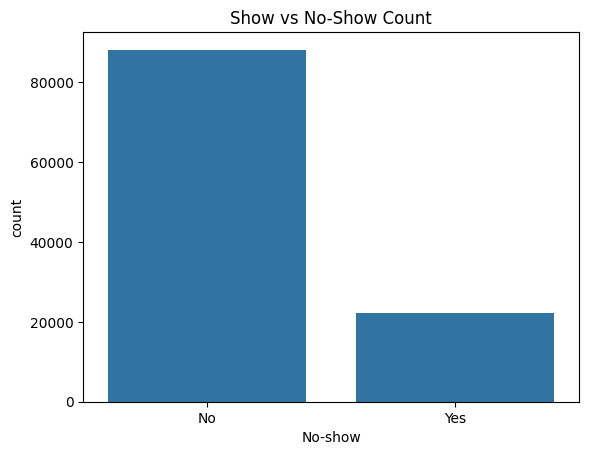

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# No-show counts
sns.countplot(data=df, x='No-show')
plt.title('Show vs No-Show Count')
plt.show()

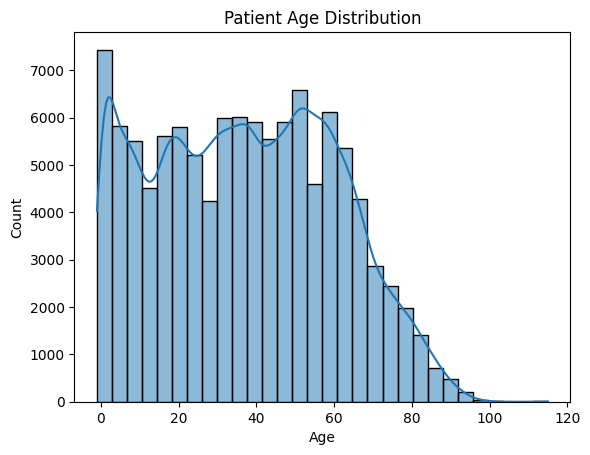

In [9]:
# Age distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Patient Age Distribution')
plt.show()

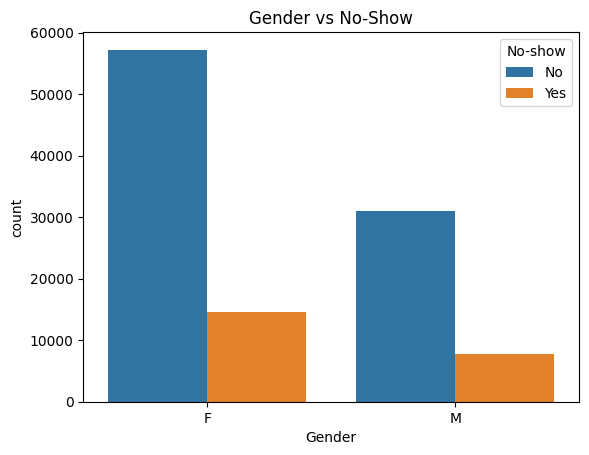

In [10]:
# Gender breakdown
sns.countplot(data=df, x='Gender', hue='No-show')
plt.title('Gender vs No-Show')
plt.show()

In [13]:
import pandas as pd             #Create a preprocessing pipeline in Python using pandas and scikit-learn
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
df = pd.read_csv(path + "/KaggleV2-May-2016.csv")

In [15]:
# View missing values
print(df.isnull().sum())

# Drop columns with too many missing values (if any)
df = df.dropna(axis=1, thresh=len(df) * 0.8)

# Or fill them
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [16]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Example: Treat 'Age'
df = remove_outliers_iqr(df, 'Age')


When you're working with machine learning models, most algorithms can only work with numbers so we convert variables lik male and female into integers

In [18]:
import sklearn
from sklearn.preprocessing import OneHotEncoder           #convert variables like male and female into numbers

if sklearn.__version__ >= "1.2":
    cat_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
else:
    cat_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)



TThen we turn Column names into meaningful numerical features for preprocessing.



In [19]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Drop ID-like columns if needed
numerical_cols = [col for col in numerical_cols if col not in ['PatientId', 'AppointmentID']]


Machine learning models can’t handle missing values or strings. This preprocessor:

Cleans up the data

Makes everything numeric

Ensures all features are on the same scale

In [20]:
# Column transformer- preprocessing pipeline in machine learning
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', num_imputer),
            ('scaler', StandardScaler())
        ]), numerical_cols),

        ('cat', Pipeline([
            ('imputer', cat_imputer),
            ('encoder', cat_encoder)
        ]), categorical_cols)
    ])


In [21]:
pca = PCA(n_components=0.95)  # keep 95% variance
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca)
])


In [24]:
print(df.columns.tolist())


['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']


In [27]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['PatientId', 'AppointmentID', 'No-show']]  # make sure 'No-show' is NOT here

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'No-show']  # make sure it's not here either


In [30]:
print(numerical_cols)
print(categorical_cols)


['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
['Gender', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood']


In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

In [32]:
df_cleaned = df.drop(['PatientId', 'AppointmentID'], axis=1)
X = df_cleaned.drop('No-show', axis=1)
y = df_cleaned['No-show'].map({'No': 0, 'Yes': 1})  # encode target

In [33]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

In [34]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [35]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # For sklearn >= 1.2
])

In [36]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols)
])

In [1]:
preprocessor.fit(X)

NameError: name 'preprocessor' is not defined